In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import RobustScaler

In [5]:
df = pd.read_excel("data.xlsx")

In [6]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [7]:
df.describe

<bound method NDFrame.describe of        bhk       type                              locality  area  price  \
0        3  Apartment   Lak And Hanware The Residency Tower   685   2.50   
1        2  Apartment     Radheya Sai Enclave Building No 2   640  52.51   
2        2  Apartment                         Romell Serene   610   1.73   
3        2  Apartment  Soundlines Codename Urban Rainforest   876  59.98   
4        2  Apartment                         Origin Oriana   659  94.11   
...    ...        ...                                   ...   ...    ...   
76033    3  Apartment                     Parinee Liva Roca  1527   7.00   
76034    5  Apartment                     Parinee Liva Roca  3049  12.00   
76035    4  Apartment                         Lodha Seaview  3313  10.00   
76036    2  Apartment                        Hubtown Serene  1305   4.25   
76037    5  Apartment              Sunteck Signature Island  5200  25.00   

      price_unit                region              s

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

bhk           0
type          0
locality      0
area          0
price         0
price_unit    0
region        0
status        0
age           0
dtype: int64


In [9]:
# Define multipliers based on Indian numbering system
unit_multiplier = {
    'L': 1e5,   
    'Cr': 1e7   
}

# Calculate total_price in rupees
df['total_price'] = df['price'] * df['price_unit'].map(unit_multiplier)


In [10]:

df[['price', 'price_unit', 'total_price']].head()


,price,price_unit,total_price
0,2.50,Cr,25000000.0
1,52.51,L,5251000.0
2,1.73,Cr,17300000.0
3,59.98,L,5998000.0
4,94.11,L,9411000.0


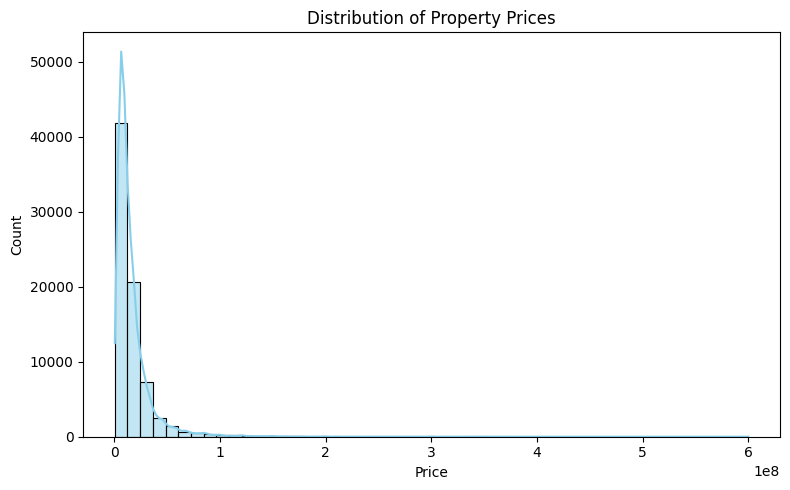

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='total_price', bins=50, kde=True, color='skyblue')
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


C:\Users\mites\AppData\Local\Temp\ipykernel_14248\2874107205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bhk', palette='viridis')


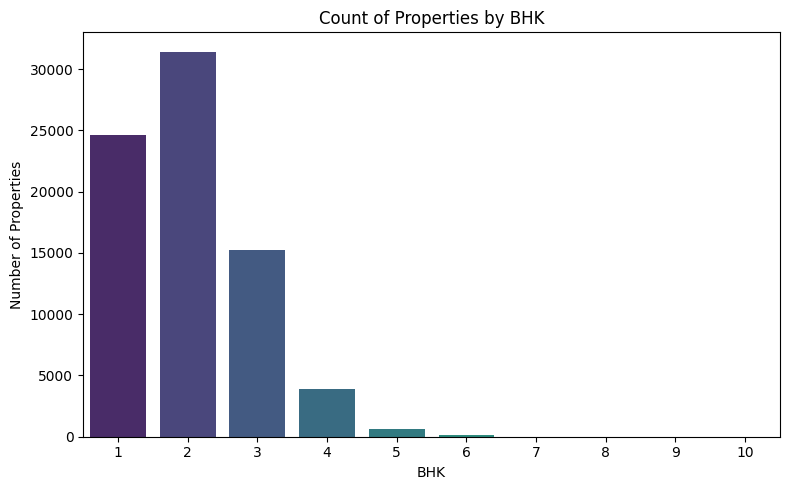

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bhk', palette='viridis')
plt.title("Count of Properties by BHK")
plt.xlabel("BHK")
plt.ylabel("Number of Properties")
plt.tight_layout()
plt.show()


C:\Users\mites\AppData\Local\Temp\ipykernel_14248\1380230489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_localities.values, y=top_localities.index, palette='mako')


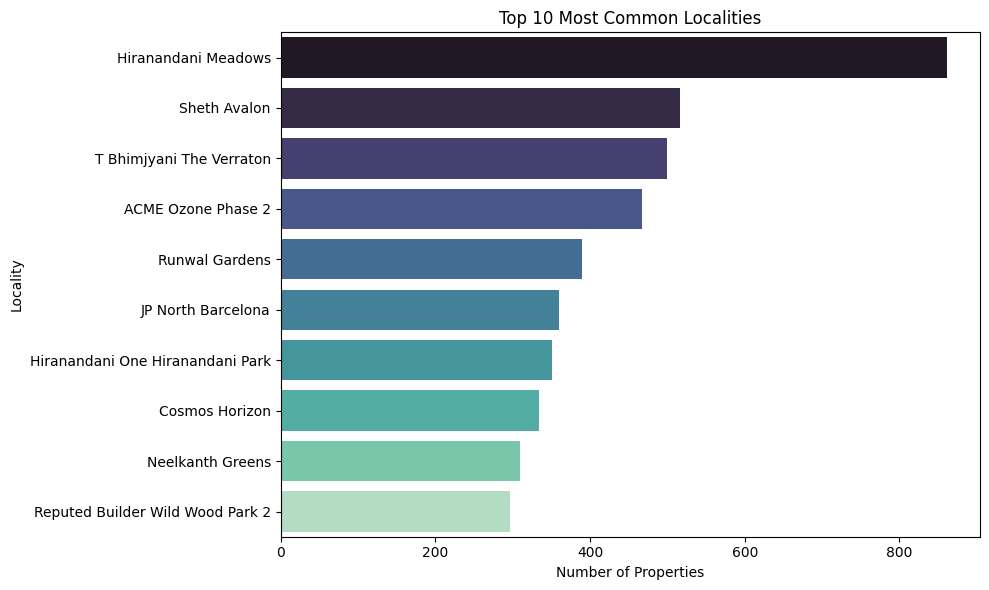

In [13]:
top_localities = df['locality'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_localities.values, y=top_localities.index, palette='mako')
plt.title("Top 10 Most Common Localities")
plt.xlabel("Number of Properties")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()


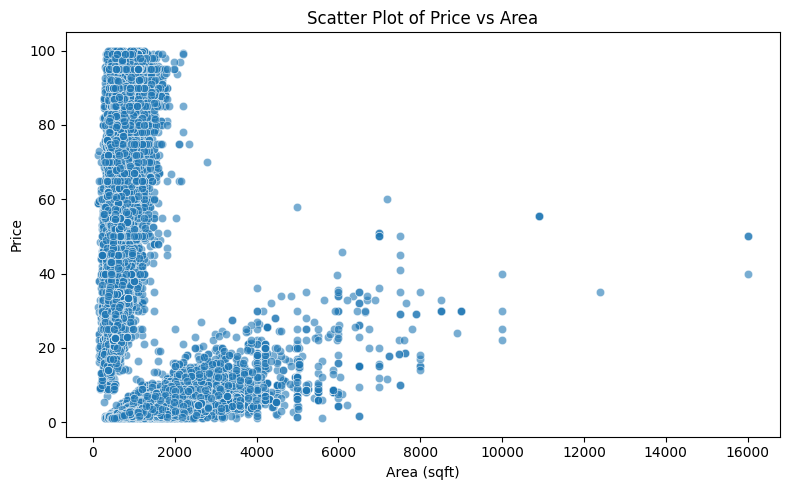

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='area', y='price', alpha=0.6)
plt.title("Scatter Plot of Price vs Area")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()


In [10]:
# Drop 'price' and 'price_unit' columns
df.drop(columns=['locality','price', 'price_unit'], inplace=True)


In [11]:
df.head()

,bhk,type,area,region,status,age,total_price
0,3,Apartment,685,Andheri West,Ready to move,New,25000000.0
1,2,Apartment,640,Naigaon East,Under Construction,New,5251000.0
2,2,Apartment,610,Borivali West,Under Construction,New,17300000.0
3,2,Apartment,876,Panvel,Under Construction,New,5998000.0
4,2,Apartment,659,Mira Road East,Under Construction,New,9411000.0


In [12]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['type', 'region', 'status', 'age'], drop_first=True)

# Preview the encoded DataFrame
df_encoded.head()


,bhk,area,total_price,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,...,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,status_Under Construction,age_Resale,age_Unknown
0,3,685,25000000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,640,5251000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2,610,17300000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2,876,5998000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2,659,9411000.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [13]:
# Convert all Boolean columns to integers
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

df_encoded.head()

,bhk,area,total_price,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,...,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,status_Under Construction,age_Resale,age_Unknown
0,3,685,25000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,640,5251000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,610,17300000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,876,5998000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2,659,9411000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


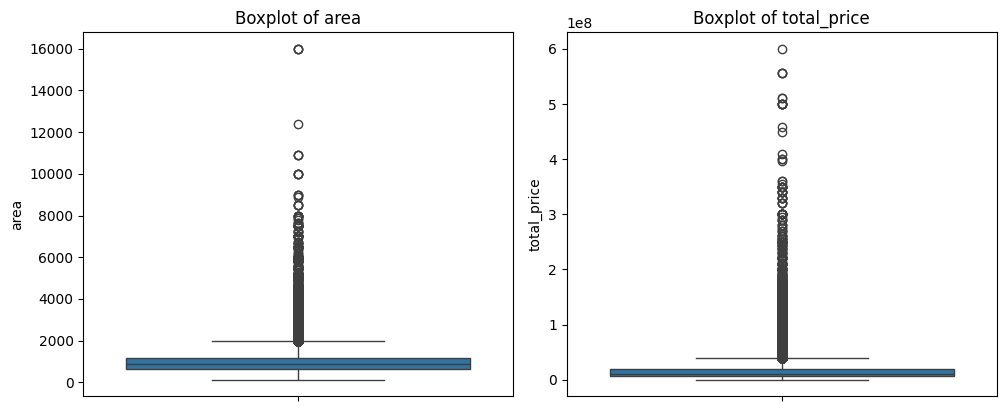

In [14]:
# List of numerical columns
num_cols = ['area', 'total_price']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [15]:
#df_encoded.to_excel("processed_NSC_data.xlsx", index=False)

In [16]:
# Features to scale (excluding the target `total_price`)
cols_to_scale = ['area', 'bhk']

scaler = RobustScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])


In [17]:
df_encoded.head()

,bhk,area,total_price,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,region_Agripada,region_Airoli,region_Ambarnath,...,region_Warai,region_Worli,region_kandivali,region_kasaradavali thane west,region_mumbai,region_sector,region_vile parle west,status_Under Construction,age_Resale,age_Unknown
0,0.5,-0.346939,25000000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-0.430427,5251000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.0,-0.486085,17300000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,0.007421,5998000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,-0.395176,9411000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#df_encoded.to_excel("processed_SCL_data.xlsx", index=False)

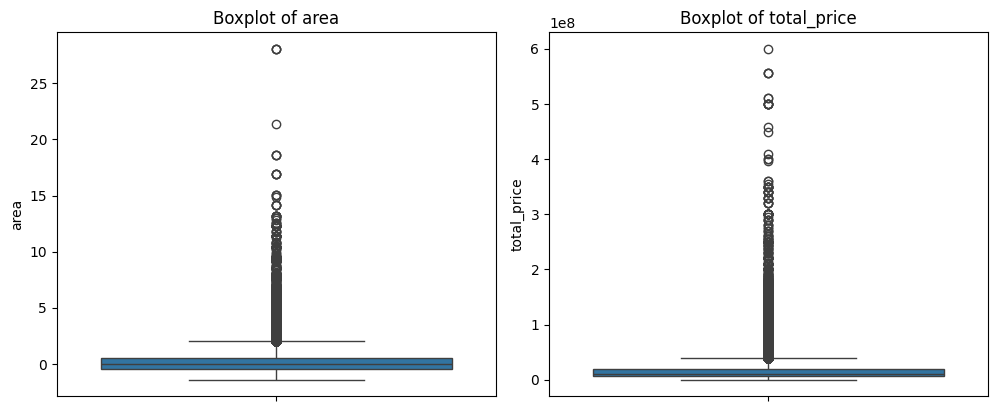

In [21]:
# List of numerical columns
num_cols = ['area', 'total_price']

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()